/var/folders/vg/sx4xytfs3d7259x53nqmn0s80000gn/T/ipykernel_7066/1139527043.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Balance'].fillna(train_data['Balance'].median(), inplace=True)
/var/folders/vg/sx4xytfs3d7259x53nqmn0s80000gn/T/ipykernel_7066/1139527043.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

Accuracy: 0.7188
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.78       484
           1       0.69      0.53      0.60       316

    accuracy                           0.72       800
   macro avg       0.71      0.69      0.69       800
weighted avg       0.71      0.72      0.71       800



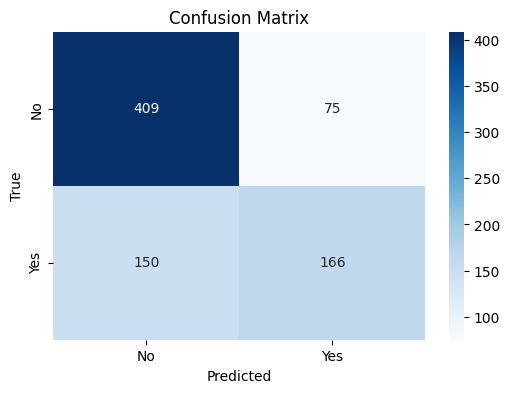

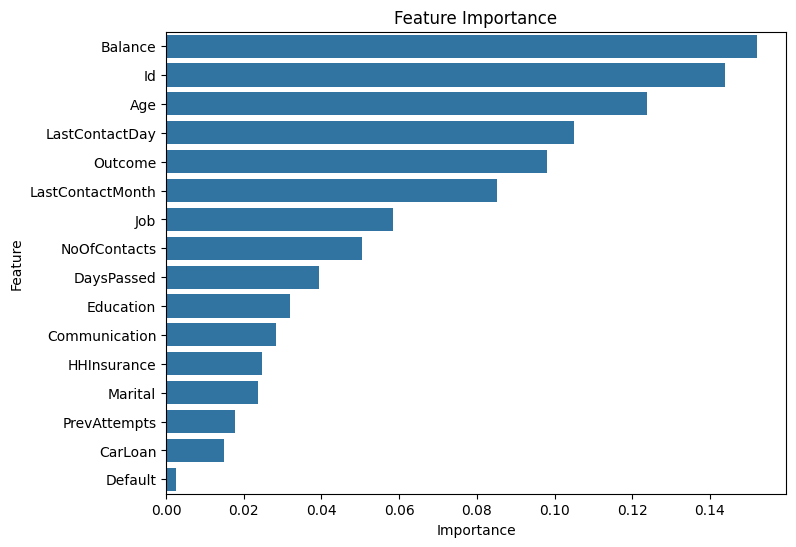

     Id  PredictedCarInsurance
0  4001                      0
1  4002                      1
2  4003                      1
3  4004                      0
4  4005                      0


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load training and test data
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")

# Step 1: Data Preprocessing
# Handle categorical features with Label Encoding
categorical_columns = ['Job', 'Marital', 'Education', 'Default', 'Communication', 'LastContactMonth', 'Outcome']
le = LabelEncoder()

for col in categorical_columns:
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    test_data[col] = le.transform(test_data[col].astype(str))

# Fill missing values for numerical columns, such as Balance, with the median value
train_data['Balance'].fillna(train_data['Balance'].median(), inplace=True)
test_data['Balance'].fillna(test_data['Balance'].median(), inplace=True)

# Step 2: Drop time-based columns (or convert them if needed)
train_data.drop(columns=['CallStart', 'CallEnd'], inplace=True)
test_data.drop(columns=['CallStart', 'CallEnd'], inplace=True)

# Step 3: Feature Scaling
scaler = StandardScaler()
train_data[['Balance', 'Age', 'NoOfContacts', 'DaysPassed', 'PrevAttempts']] = scaler.fit_transform(
    train_data[['Balance', 'Age', 'NoOfContacts', 'DaysPassed', 'PrevAttempts']])
test_data[['Balance', 'Age', 'NoOfContacts', 'DaysPassed', 'PrevAttempts']] = scaler.transform(
    test_data[['Balance', 'Age', 'NoOfContacts', 'DaysPassed', 'PrevAttempts']])

# Step 4: Splitting the training data into train and validation sets
X = train_data.drop('CarInsurance', axis=1)
y = train_data['CarInsurance']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Bagging Classifier without base_estimator parameter
bagging_model = BaggingClassifier(n_estimators=50, random_state=42)

# Train the model
bagging_model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = bagging_model.predict(X_val)

# Accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 7: Feature Importance Visualization from Base Estimators
importances = np.mean([tree.feature_importances_ for tree in bagging_model.estimators_], axis=0)

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# Step 8: Predicting on the test data
X_test = test_data.drop('CarInsurance', axis=1)

# Save the 'Id' column separately before dropping it
test_ids = test_data['Id']

# Predict on the test set
y_test_pred = bagging_model.predict(X_test)

# Add predictions to the test data (including the preserved 'Id' column)
test_data['PredictedCarInsurance'] = y_test_pred

# Save predictions along with 'Id' to a CSV file
test_data[['Id', 'PredictedCarInsurance']].to_csv('predictions.csv', index=False)

# Output some predictions (including the 'Id' column)
print(test_data[['Id', 'PredictedCarInsurance']].head())


XGBoost Accuracy: 0.7375
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       484
           1       0.77      0.48      0.59       316

    accuracy                           0.74       800
   macro avg       0.75      0.69      0.70       800
weighted avg       0.74      0.74      0.72       800



/var/folders/vg/sx4xytfs3d7259x53nqmn0s80000gn/T/ipykernel_7066/757702331.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Balance'].fillna(train_data['Balance'].median(), inplace=True)
/var/folders/vg/sx4xytfs3d7259x53nqmn0s80000gn/T/ipykernel_7066/757702331.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

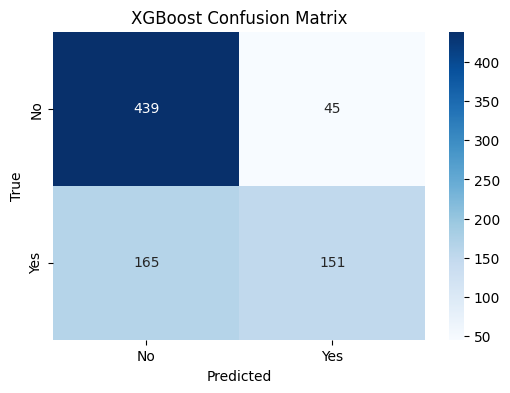

GBM Accuracy: 0.7375
GBM Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.81       484
           1       0.76      0.49      0.59       316

    accuracy                           0.74       800
   macro avg       0.75      0.69      0.70       800
weighted avg       0.74      0.74      0.72       800



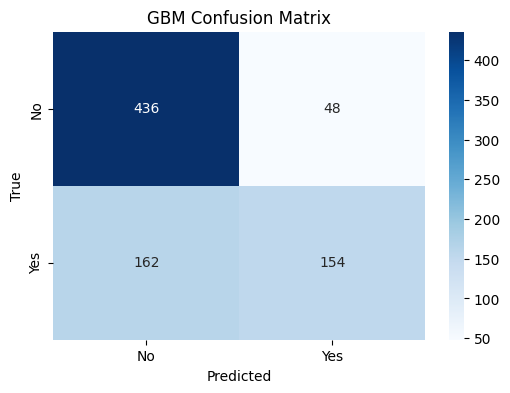

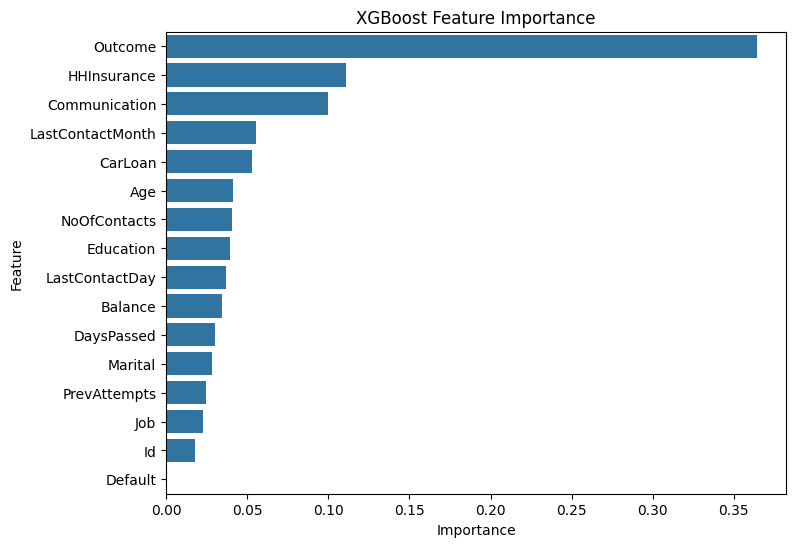

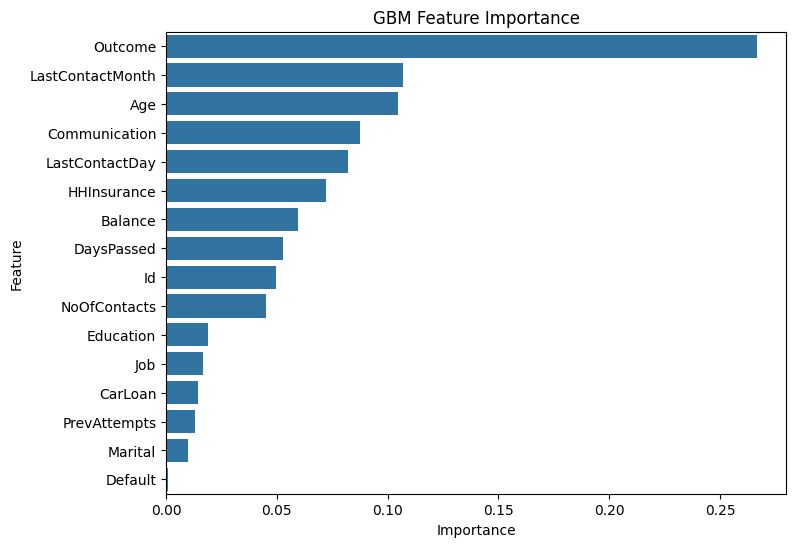

     Id  PredictedCarInsurance_XGB  PredictedCarInsurance_GBM
0  4001                          0                          0
1  4002                          0                          0
2  4003                          0                          0
3  4004                          0                          0
4  4005                          0                          0


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

# Load training and test data
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")

# Step 1: Data Preprocessing (same as before)
categorical_columns = ['Job', 'Marital', 'Education', 'Default', 'Communication', 'LastContactMonth', 'Outcome']
le = LabelEncoder()

for col in categorical_columns:
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    test_data[col] = le.transform(test_data[col].astype(str))

# Fill missing values for numerical columns, such as Balance, with the median value
train_data['Balance'].fillna(train_data['Balance'].median(), inplace=True)
test_data['Balance'].fillna(test_data['Balance'].median(), inplace=True)

# Step 2: Drop time-based columns (or convert them if needed)
train_data.drop(columns=['CallStart', 'CallEnd'], inplace=True)
test_data.drop(columns=['CallStart', 'CallEnd'], inplace=True)

# Step 3: Feature Scaling
scaler = StandardScaler()
train_data[['Balance', 'Age', 'NoOfContacts', 'DaysPassed', 'PrevAttempts']] = scaler.fit_transform(
    train_data[['Balance', 'Age', 'NoOfContacts', 'DaysPassed', 'PrevAttempts']])
test_data[['Balance', 'Age', 'NoOfContacts', 'DaysPassed', 'PrevAttempts']] = scaler.transform(
    test_data[['Balance', 'Age', 'NoOfContacts', 'DaysPassed', 'PrevAttempts']])

# Step 4: Splitting the training data into train and validation sets
X = train_data.drop('CarInsurance', axis=1)
y = train_data['CarInsurance']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train XGBoost Model
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Step 6: Evaluate XGBoost Model
y_pred_xgb = xgb_model.predict(X_val)

# Accuracy
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

# Classification report
print("XGBoost Classification Report:")
print(classification_report(y_val, y_pred_xgb))

# Confusion Matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_val, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoost Confusion Matrix')
plt.show()

# Step 7: Train GBM Model
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the GBM model
gbm_model.fit(X_train, y_train)

# Step 8: Evaluate GBM Model
y_pred_gbm = gbm_model.predict(X_val)

# Accuracy
accuracy_gbm = accuracy_score(y_val, y_pred_gbm)
print(f"GBM Accuracy: {accuracy_gbm:.4f}")

# Classification report
print("GBM Classification Report:")
print(classification_report(y_val, y_pred_gbm))

# Confusion Matrix for GBM
conf_matrix_gbm = confusion_matrix(y_val, y_pred_gbm)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('GBM Confusion Matrix')
plt.show()

# Step 9: Feature Importance Visualization (for XGBoost and GBM)
# XGBoost Feature Importance
xgb_importance = xgb_model.feature_importances_

# GBM Feature Importance
gbm_importance = gbm_model.feature_importances_

# Create DataFrame for XGBoost feature importances
xgb_feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_importance
})
xgb_feature_importance_df = xgb_feature_importance_df.sort_values(by='Importance', ascending=False)

# Create DataFrame for GBM feature importances
gbm_feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gbm_importance
})
gbm_feature_importance_df = gbm_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting Feature Importances for XGBoost
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_feature_importance_df)
plt.title('XGBoost Feature Importance')
plt.show()

# Plotting Feature Importances for GBM
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=gbm_feature_importance_df)
plt.title('GBM Feature Importance')
plt.show()

# Step 10: Predicting on the test data (same as before)
X_test = test_data.drop('CarInsurance', axis=1)
test_ids = test_data['Id']

# Predict on the test set using XGBoost
y_test_pred_xgb = xgb_model.predict(X_test)

# Predict on the test set using GBM
y_test_pred_gbm = gbm_model.predict(X_test)

# Add predictions to the test data (including the preserved 'Id' column)
test_data['PredictedCarInsurance_XGB'] = y_test_pred_xgb
test_data['PredictedCarInsurance_GBM'] = y_test_pred_gbm

# Save predictions for XGBoost and GBM to a CSV file
test_data[['Id', 'PredictedCarInsurance_XGB', 'PredictedCarInsurance_GBM']].to_csv('predictions_boosting.csv', index=False)

# Output some predictions (including the 'Id' column)
print(test_data[['Id', 'PredictedCarInsurance_XGB', 'PredictedCarInsurance_GBM']].head())


Tuning Logistic Regression...


/var/folders/vg/sx4xytfs3d7259x53nqmn0s80000gn/T/ipykernel_7066/2826302307.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Balance'].fillna(train_data['Balance'].median(), inplace=True)
/var/folders/vg/sx4xytfs3d7259x53nqmn0s80000gn/T/ipykernel_7066/2826302307.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

Tuning Decision Tree...
Tuning Random Forest...
Tuning XGBoost...
Tuning GBM...
--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.67      0.88      0.76       484
           1       0.66      0.34      0.45       316

    accuracy                           0.67       800
   macro avg       0.67      0.61      0.61       800
weighted avg       0.67      0.67      0.64       800

Confusion Matrix:


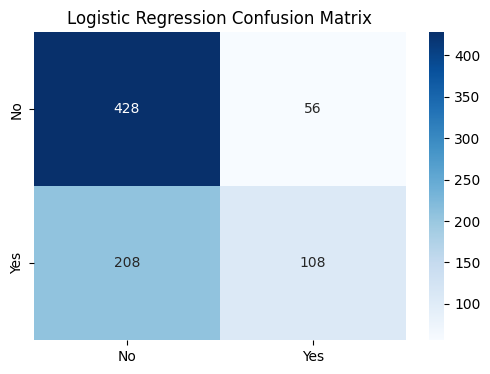

--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       484
           1       0.61      0.48      0.54       316

    accuracy                           0.67       800
   macro avg       0.66      0.64      0.64       800
weighted avg       0.67      0.67      0.66       800

Confusion Matrix:


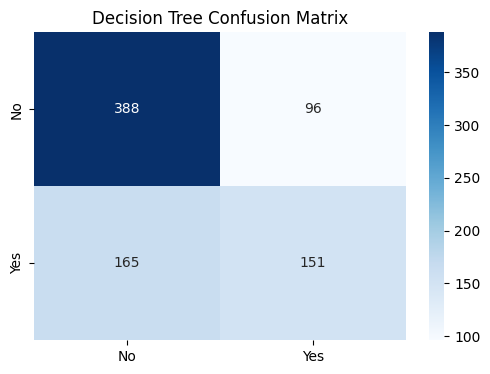

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       484
           1       0.81      0.44      0.57       316

    accuracy                           0.74       800
   macro avg       0.76      0.69      0.69       800
weighted avg       0.75      0.74      0.72       800

Confusion Matrix:


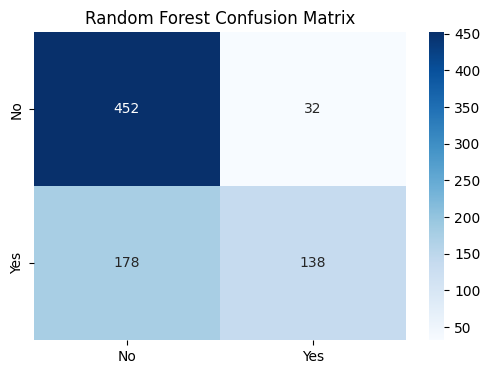

--- XGBoost ---
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       484
           1       0.75      0.47      0.58       316

    accuracy                           0.73       800
   macro avg       0.74      0.68      0.69       800
weighted avg       0.73      0.73      0.71       800

Confusion Matrix:


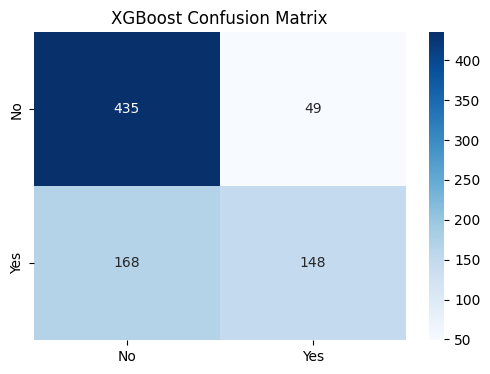

--- GBM ---
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       484
           1       0.74      0.51      0.60       316

    accuracy                           0.73       800
   macro avg       0.73      0.69      0.70       800
weighted avg       0.73      0.73      0.72       800

Confusion Matrix:


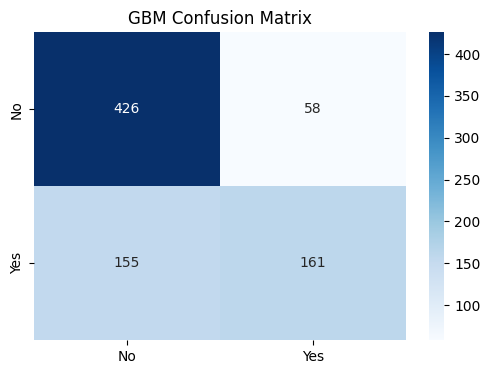

Model Comparison Table:
                     Accuracy  Precision    Recall  F1-Score   ROC AUC
Logistic Regression   0.67000   0.658537  0.341772  0.450000  0.665512
Decision Tree         0.67375   0.611336  0.477848  0.536412  0.696199
Random Forest         0.73750   0.811765  0.436709  0.567901  0.749752
XGBoost               0.72875   0.751269  0.468354  0.576998  0.734272
GBM                   0.73375   0.735160  0.509494  0.601869  0.756486
Comparison table and test predictions saved to Excel.


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")

# Step 1: Data Preprocessing (same as before)
categorical_columns = ['Job', 'Marital', 'Education', 'Default', 'Communication', 'LastContactMonth', 'Outcome']
le = LabelEncoder()

for col in categorical_columns:
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    test_data[col] = le.transform(test_data[col].astype(str))

# Fill missing values for numerical columns
train_data['Balance'].fillna(train_data['Balance'].median(), inplace=True)
test_data['Balance'].fillna(test_data['Balance'].median(), inplace=True)

# Drop time-based columns
train_data.drop(columns=['CallStart', 'CallEnd'], inplace=True)
test_data.drop(columns=['CallStart', 'CallEnd'], inplace=True)

# Feature Scaling
scaler = StandardScaler()
train_data[['Balance', 'Age', 'NoOfContacts', 'DaysPassed', 'PrevAttempts']] = scaler.fit_transform(
    train_data[['Balance', 'Age', 'NoOfContacts', 'DaysPassed', 'PrevAttempts']])
test_data[['Balance', 'Age', 'NoOfContacts', 'DaysPassed', 'PrevAttempts']] = scaler.transform(
    test_data[['Balance', 'Age', 'NoOfContacts', 'DaysPassed', 'PrevAttempts']])

# Step 2: Splitting data
X = train_data.drop('CarInsurance', axis=1)
y = train_data['CarInsurance']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training with Hyperparameter Tuning
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "GBM": GradientBoostingClassifier()
}

# Hyperparameter grids for tuning
param_grids = {
    "Logistic Regression": {'C': [0.01, 0.1, 1, 10, 100]},
    "Decision Tree": {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]},
    "Random Forest": {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]},
    "XGBoost": {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    "GBM": {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
}

# Perform GridSearchCV for model tuning
best_models = {}
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_

# Step 4: Evaluate Models
evaluation_metrics = {}

for model_name, model in best_models.items():
    # Predict on validation set
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]  # For ROC AUC

    # Calculate various evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob)

    # Store metrics
    evaluation_metrics[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc
    }

    # Display Classification Report and Confusion Matrix
    print(f"--- {model_name} ---")
    print(classification_report(y_val, y_pred))
    print("Confusion Matrix:")
    conf_matrix = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Step 5: Prepare Comparison Table
evaluation_df = pd.DataFrame(evaluation_metrics).T
print("Model Comparison Table:")
print(evaluation_df)

# Step 6: Predict for the 1000 customers in the test data
X_test = test_data.drop('CarInsurance', axis=1)
test_ids = test_data['Id']

# Generate predictions for all models
test_predictions = {}
for model_name, model in best_models.items():
    y_test_pred = model.predict(X_test)
    test_predictions[model_name] = y_test_pred

# Combine results into a DataFrame
test_data['Predictions'] = test_predictions["XGBoost"]  # You can choose the model you prefer
test_data[['Id', 'Predictions']].to_csv('model_predictions.csv', index=False)

# Step 7: Final Comparison Table to Excel
with pd.ExcelWriter('model_comparison.xlsx') as writer:
    evaluation_df.to_excel(writer, sheet_name='Model Comparison')
    test_data[['Id', 'Predictions']].to_excel(writer, sheet_name='Test Predictions')

print("Comparison table and test predictions saved to Excel.")
